In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# show all columns 
pd.set_option('display.max_columns', None)

In [3]:
# open beer_df.csv
beer_df = pd.read_csv('data/beer_df.csv', low_memory=False)
beer_df.head()


,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,1026313935,4.5,4.0,5.0,jool,American IPA,4.5,4.5,Hop Caen,7.0,4205
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,1298940583,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,1228417395,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,1264280146,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,1270753134,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510


In [4]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167421 entries, 0 to 167420
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   address             167421 non-null  object 
 1   categories          167421 non-null  object 
 2   city                167421 non-null  object 
 3   country             167421 non-null  object 
 4   key                 167421 non-null  object 
 5   lat                 167421 non-null  float64
 6   long                167421 non-null  float64
 7   brewery_name        167421 non-null  object 
 8   phones              167421 non-null  object 
 9   postalCode          167421 non-null  int64  
 10  province            167421 non-null  object 
 11  websites            167421 non-null  object 
 12  index               167421 non-null  int64  
 13  brewery_id          167421 non-null  int64  
 14  review_time         167421 non-null  int64  
 15  review_overall      167421 non-nul

In [5]:
# convert review time to datetime
beer_df['review_time'] = pd.to_datetime(beer_df['review_time'], unit='s')


In [6]:
# create new column of year based on review time
beer_df['review_year'] = beer_df['review_time'].dt.year
beer_df.head()

,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year
0,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,2002-07-10 15:12:15,4.5,4.0,5.0,jool,American IPA,4.5,4.5,Hop Caen,7.0,4205,2002
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010


In [7]:
# create new column of month based on review time
beer_df['review_month'] = beer_df['review_time'].dt.month
beer_df.head()


,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year,review_month
0,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1494802,735,2002-07-10 15:12:15,4.5,4.0,5.0,jool,American IPA,4.5,4.5,Hop Caen,7.0,4205,2002,7
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011,3
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008,12
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010,1
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010,4


## Data Visualization

<AxesSubplot:xlabel='review_year'>

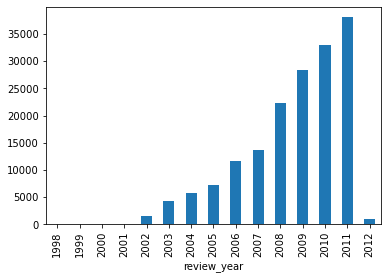

In [8]:
# plot review count by year
beer_df.groupby('review_year')['review_overall'].count().plot(kind='bar')

# drop < 5000 entries 

decided to drop all rows that have less than 5000 entries per year, as it might help the recommendation systems accuracy. 

In [9]:
# drop rows by review_year that have less than 5000 reviews 
beer_df = beer_df[beer_df.groupby('review_year')['review_overall'].transform('count').ge(5000)]
beer_df.head()


,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_year,review_month
1,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495017,735,2011-03-01 00:49:43,3.5,3.5,4.0,illidurit,American Double / Imperial IPA,3.5,3.5,21 Rock,9.7,66190,2011,3
2,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495350,735,2008-12-04 19:03:15,4.0,4.0,4.0,magictrokini,American IPA,3.0,4.0,Harvest Moon,6.4,45648,2008,12
3,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1495733,735,2010-01-23 20:55:46,4.0,4.0,3.5,HapWifeHapLife,American IPA,4.0,4.0,21st Amendment IPA,7.0,20781,2010,1
4,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501253,735,2010-04-08 18:58:54,4.0,3.5,4.5,pwoody11,Belgian Strong Dark Ale,4.0,4.0,Monk's Blood,8.3,52510,2010,4
5,2010 Williams St,Brewery,San Leandro,US,us/ca/sanleandro/2010williamsst,37.711807,-122.177658,21st Amendment Brewery,5105952111,94577,CA,http://21st-amendment.com,1501262,735,2010-03-14 16:30:10,4.0,3.5,4.0,metter98,Belgian Strong Dark Ale,4.0,4.5,Monk's Blood,8.3,52510,2010,3


In [10]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160451 entries, 1 to 167420
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   address             160451 non-null  object        
 1   categories          160451 non-null  object        
 2   city                160451 non-null  object        
 3   country             160451 non-null  object        
 4   key                 160451 non-null  object        
 5   lat                 160451 non-null  float64       
 6   long                160451 non-null  float64       
 7   brewery_name        160451 non-null  object        
 8   phones              160451 non-null  object        
 9   postalCode          160451 non-null  int64         
 10  province            160451 non-null  object        
 11  websites            160451 non-null  object        
 12  index               160451 non-null  int64         
 13  brewery_id          160451 no

<AxesSubplot:xlabel='review_year'>

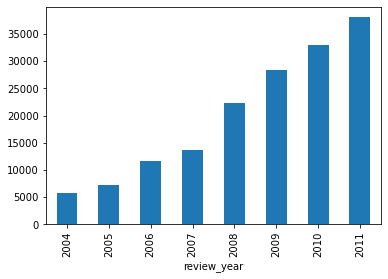

In [11]:
beer_df.groupby('review_year')['review_overall'].count().plot(kind='bar')

<AxesSubplot:xlabel='review_month'>

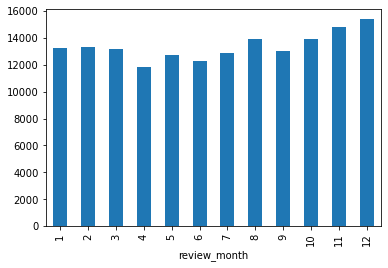

In [12]:
# plot review count by month
beer_df.groupby('review_month')['review_overall'].count().plot(kind='bar')


<AxesSubplot:xlabel='brewery_name'>

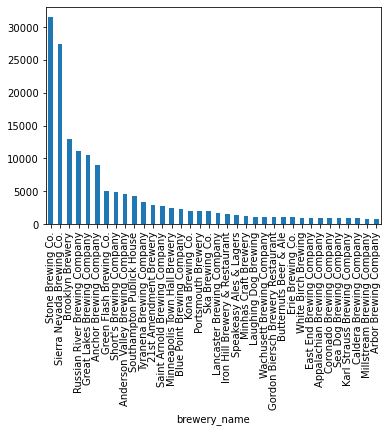

In [13]:
# plot review count by brewery
beer_df.groupby('brewery_name')['review_overall'].count().sort_values(ascending=False).plot(kind='bar')



## Data Modeling

In [14]:
# create baseline model of beer_df with normal_predictor and train test split from surprise using this link: 
#https://www.alldatascience.com/recommender-systems/simple-recipe-recommender-system-with-scikit-surprise/
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = NormalPredictor()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.8735
MAE:  0.6869


0.6868680851925214

Our Baseline Model has shown a decent overall start, with our rmse and mae being high. Next we will try to improve those metrics. 

In [15]:
# create a model of beer_df with knn_basic and train test split from surprise using this link: https://www.alldatascience.com/recommender-systems/simple-recipe-recommender-system-with-scikit-surprise/
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = KNNBasic()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5793
MAE:  0.4272


0.4272200499423672

Our KNNBasic model has improved the metrics as the rmse and mae are better and lower than the NormalPredictor model. Lets try to improve this with KNNwithMeans.

In [16]:
# create a model of beer_df with knn_with_means and train test split from surprise using this link: https://www.alldatascience.com/recommender-systems/simple-recipe-recommender-system-with-scikit-surprise/
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5956
MAE:  0.4420


0.44200316978292853

Our model has roughly worse measures between both the KNN models. Next we will try the famous SVD algoritm before tuning our parameters. 

In [17]:
# Running a model with SVD
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


RMSE: 0.5648
MAE:  0.4199


0.4198671799965558

Our SVD Model has the best overall rmse and mae compared to our other models. We can now try it with more factors to see if any changes will occur. 

In [18]:
# run another model with SVD with recommended amount of parameters but with a model size of 50 
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = SVD(n_factors=50)
algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


RMSE: 0.5536
MAE:  0.4133


0.4132710285183288

In [19]:
# run cross validation on SVD model with 50 factors
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5561  0.5652  0.5580  0.5565  0.5573  0.5586  0.0034  
MAE (testset)     0.4142  0.4208  0.4159  0.4143  0.4156  0.4162  0.0024  
Fit time          3.70    3.67    3.66    3.62    3.60    3.65    0.04    
Test time         0.13    0.11    0.18    0.19    0.11    0.14    0.03    


{'test_rmse': array([0.55608823, 0.5651836 , 0.55795326, 0.55646787, 0.55728197]),
 'test_mae': array([0.41421944, 0.42078752, 0.41590054, 0.41431383, 0.4156031 ]),
 'fit_time': (3.701500177383423,
  3.670919895172119,
  3.6635122299194336,
  3.615415096282959,
  3.6049790382385254),
 'test_time': (0.12720394134521484,
  0.11410117149353027,
  0.18160700798034668,
  0.18604087829589844,
  0.11264610290527344)}

In [20]:
# run a model with NMF 
from surprise import NMF
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = NMF()
algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


RMSE: 0.6073
MAE:  0.4593


0.45927090557355427

Our original SVD Model has the best overall rmse and mae compared to our other models. Now we can try tuning our parameters to improve our accuracy.

Following collaborative recommendation system was influenced by mxie87 on github. 

Creating new dataframe of only data needed in model. 
Use both surprise library an sklearn.

In [21]:
# use this link to create collaborative recommendation system:https://github.com/mxie87/Beer_Recommender_CF/blob/master/BEER_RECOMMENDER_CF.ipynb

In [22]:
# create new dataframe of beer_df with only the columns needed for the model
reviews_df = beer_df[['beer_name', 'review_profilename', 'review_overall']]
reviews_df.head()


,beer_name,review_profilename,review_overall
1,21 Rock,illidurit,3.5
2,Harvest Moon,magictrokini,4.0
3,21st Amendment IPA,HapWifeHapLife,4.0
4,Monk's Blood,pwoody11,4.0
5,Monk's Blood,metter98,4.0


In [23]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160451 entries, 1 to 167420
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_name           160451 non-null  object 
 1   review_profilename  160451 non-null  object 
 2   review_overall      160451 non-null  float64
dtypes: float64(1), object(2)
memory usage: 4.9+ MB


In [24]:
grouped_beers = reviews_df.groupby('beer_name')
grouped_beers.count().sort_values(by='review_profilename', ascending = False).quantile(np.arange(0,1,.05))


,review_profilename,review_overall
0.00,1.0,1.0
0.05,1.0,1.0
0.10,1.0,1.0
0.15,1.0,1.0
0.20,2.0,2.0
0.25,3.0,3.0
0.30,3.0,3.0
0.35,4.0,4.0
0.40,5.0,5.0
0.45,6.0,6.0


About 90% of beers have almost 200 ratings

In [25]:
grouped_beers.mean().sort_values(by='review_overall', ascending = False).quantile(np.arange(0,1,.05))


,review_overall
0.00,1.000000
0.05,3.000000
0.10,3.357143
0.15,3.500000
0.20,3.555297
0.25,3.651994
0.30,3.738703
0.35,3.780187
0.40,3.833333
0.45,3.885519


In [26]:
avg_rating = grouped_beers.mean()

# I am definining beers with average rating less than 3.5 to be considered subpar 
# since a 3.5 avg rating would put it in the bottom 10 percentile of these beers
subpar_average_mask = avg_rating['review_overall'] < 3.5
subpar_beers_count = len(avg_rating[subpar_average_mask])

print('There are {} unique beers in the dataset'.format(len(reviews_df['beer_name'].unique())))
print('{} beers have a average rating less than 3.5'.format(subpar_beers_count))
print('A 3.5 avg rating puts the beer within the bottom 15%')

There are 2010 unique beers in the dataset
255 beers have a average rating less than 3.5
A 3.5 avg rating puts the beer within the bottom 15%


In [27]:
grouped_users = reviews_df.groupby('review_profilename')


In [28]:
grouped_users_count = grouped_users.count()

counts = [1,2,3,4,5,10,15,20]
for ct in counts:
    num_users = grouped_users_count[grouped_users_count['review_overall'] <= ct].count()[0]
    print('{} users rated {} or less beers'.format(num_users,ct))

print('\n')
print('Total Unique Users in this dataset: {}'.format(len(reviews_df.review_profilename.unique())))

5168 users rated 1 or less beers
7070 users rated 2 or less beers
8167 users rated 3 or less beers
8872 users rated 4 or less beers
9432 users rated 5 or less beers
10924 users rated 10 or less beers
11712 users rated 15 or less beers
12204 users rated 20 or less beers


Total Unique Users in this dataset: 14172


Majority of users have rated less than a few beers, with more than half rating less than 5 beers.

In order to improve results of recommendation system. 

I have considered dropping the last 15% of the data in terms of average rating and user activity. But with consideration to the surprise libraries "shrinkage factor", it will punish the items/users with little to no reviews. 

In [29]:
# run a model with SVD using reviews_df
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1.0, 5.0))
data = Dataset.load_from_df(reviews_df[['review_profilename', 'beer_name', 'review_overall']], reader)

trainset, testset = train_test_split(data, test_size=.25)

algo = SVD()
algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)


RMSE: 0.5598
MAE:  0.4181


0.4180992438926743

Scores are about the same as before, but being that our MAE is around a 0.4 is very good for a cold-start recommender system. 

In [30]:
# create a baseline model of entire dataset using collaborative filtering recommender system and train test split and surprise library
# https://towardsdatascience.com/building-and-testing-recommender-saystems-with-surprise-step-by-step-d4ba702ef80b

import surprise
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import train_test_split

# create a reader object
reader = Reader(rating_scale=(1, 5))

# create a dataset object
data = Dataset.load_from_df(beer_df[['review_profilename', 'beer_name', 'review_overall']], reader)

# split data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# create a SVD object
svd = SVD()

# train the model
svd.fit(trainset)

#predict ratings for the test set
predictions = svd.test(testset)

# evaluate the model
rmse(predictions)
mae(predictions)

# create a function to predict the rating of a beer for a user
def predict_rating(user, beer):
    beer_id = beer_df[beer_df['beer_name'] == beer]['beer_beerid'].unique()[0]
    user_id = beer_df[beer_df['review_profilename'] == user]['review_profilename'].unique()[0]
    return svd.predict(user_id, beer_id).est

# create a function to recommend beers to a user
def recommend_beers(user, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[beer_df['beer_name'].isin(reviewed_beers) == False]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # return the top n beers
    return not_reviewed_df.head(n)

# recommend 10 beers to user 'Sean'
#recommend_beers('HapWifeHapLife', 10)

# create a function to recommend beers to a user based on a specific style
def recommend_beers_style(user, style, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[~beer_df['beer_name'].isin(reviewed_beers)]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # get all beers of a specific style
    style_df = beer_df[beer_df['beer_style'] == style]
    # remove any duplicate beer names from the style dataframe
    style_df = style_df.drop_duplicates(subset='beer_name')
    # merge the style dataframe with the not reviewed dataframe
    merged_df = pd.merge(not_reviewed_df, style_df, on='beer_name')
    # return the top n beers
    return merged_df.head(n)

# recommend 10 beers to user of style 'American IPA'
#recommend_beers_style('HapWifeHapLife', 'American IPA', 10)

# create a function to recommend beers to a user based on a specific brewery
def recommend_beers_brewery(user, brewery, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[beer_df['beer_name'].isin(reviewed_beers) == False]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # get all beers of a specific brewery
    brewery_df = beer_df[beer_df['brewery_name'] == brewery]
    # remove any duplicate beer names from the brewery dataframe
    brewery_df = brewery_df.drop_duplicates(subset='beer_name')
    # merge the brewery dataframe with the not reviewed dataframe
    merged_df = pd.merge(not_reviewed_df, brewery_df, on='beer_name')
    # return the top n beers
    return merged_df.head(n)

# recommend 10 beers to user of style specific brewery
#recommend_beers_brewery('HapWifeHapLife', 'Sierra Nevada Brewing Co.', 10)




RMSE: 0.5614
MAE:  0.4176


In [31]:
# recommend 10 beers to user
recommend_beers('HapWifeHapLife', 10)

,beer_name,predicted_rating
0,21 Rock,3.982692
1335,Portsmouth Octoberfest,3.982692
1348,Portsmouth Munich Dunkel,3.982692
1347,Portsmouth Whipper Snapper American Mild,3.982692
1346,Portsmouth Bottle Rocket IPA,3.982692
1345,Portsmouth Belgian Wit,3.982692
1344,Portsmouth Kate The Great,3.982692
1343,Portsmouth 5 C's Pale Ale,3.982692
1342,Portsmouth Extra Special Bitter,3.982692
1341,Portsmouth Killer Bee,3.982692


In [32]:
# recommend 10 beers to user of style 'American IPA'
recommend_beers_style('HapWifeHapLife', 'American IPA', 10)

,beer_name,predicted_rating,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid,review_year,review_month
0,Portsmouth Bottle Rocket IPA,3.982692,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435195,596,2010-10-16 02:03:23,4.0,4.0,4.5,mdaschaf,American IPA,4.0,4.0,6.5,5219,2010,10
1,Portsmouth Hop Harvest #1,3.982692,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1434626,596,2011-09-28 05:11:12,4.0,4.0,4.0,Bendurgin,American IPA,3.0,4.0,6.5,20146,2011,9
2,Portsmouth Ginga' Ninja IPA,3.982692,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435532,596,2011-12-28 20:53:43,2.0,3.0,2.5,ffejherb,American IPA,2.5,2.5,6.5,70849,2011,12
3,Blind Pig IPA,3.982692,725 4th St,"Bars, Brew Pubs, Restaurants, Beer & Ale, Brew...",Santa Rosa,US,us/ca/santarosa/7254thst,38.441657,-122.711663,Russian River Brewing Company,7075452337,95404,CA,http://russianriverbrewing.com,1128310,863,2009-01-06 03:57:24,4.0,3.5,4.0,nd5282,American IPA,4.0,4.5,6.1,22790,2009,1
4,Portsmouth 5 C's IPA,3.982692,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435877,596,2011-01-23 20:02:04,4.5,4.0,5.0,dciBA,American IPA,4.0,4.5,6.5,44727,2011,1
5,Portsmouth Wild Duck Rye IPA,3.982692,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1435600,596,2011-05-30 16:14:22,4.5,4.5,3.5,Bendurgin,American IPA,4.0,4.0,6.3,69561,2011,5
6,Anniversary Ale 2011,3.982692,1430 Washington Ave S,"American Restaurant, Brewery and American Rest...",Minneapolis,US,us/mn/minneapolis/1430washingtonaves,44.973266,-93.247733,Minneapolis Town Hall Brewery,6123398696,55454,MN,http://townhallbrewery.com,357644,1177,2011-12-18 22:41:09,4.0,4.5,4.5,mothman,American IPA,4.0,4.0,6.8,74581,2011,12
7,Portsmouth Hop Harvest #2,3.982692,56 Market St,"Brewery, Bar",Portsmouth,US,us/nh/portsmouth/56marketst,43.078007,-70.757599,Portsmouth Brewery,6034311115,3801,NH,http://portsmouthbrewery.com,1434235,596,2011-10-29 13:47:01,4.0,4.0,3.5,KTCamm,American IPA,3.5,4.0,6.0,45136,2011,10
8,Short's Huma-Lupa-Licious IPA,3.982692,121 N Bridge St,Brewery,Bellaire,US,us/mi/bellaire/121nbridgest,44.976229,-85.210154,Short's Brewing Company,2314982300,49615,MI,mailto:bookings@shortsbrewing.com,1174285,9629,2011-10-10 01:38:15,3.5,3.5,4.0,ArrogantB,American IPA,4.0,3.5,6.9,17900,2011,10
9,Saint Arnold Sailing Santa,3.982692,2000 Lyons Ave,"Brewery, Beer Garden",Houston,US,us/tx/houston/2000lyonsave,29.771590,-95.348790,Saint Arnold Brewing Company,7136869494,77020,TX,http://www.saintarnold.com,1092592,337,2011-12-26 03:13:50,3.5,3.5,3.5,Beerandraiderfan,American IPA,3.5,3.5,7.0,75548,2011,12


In [33]:
# recommend 10 beers to user of style specific brewery
recommend_beers_brewery('HapWifeHapLife', 'Sierra Nevada Brewing Co.', 10)

,beer_name,predicted_rating,address,categories,city,country,key,lat,long,brewery_name,phones,postalCode,province,websites,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid,review_year,review_month
0,Pitch-A-Tent,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,72488,140,2011-12-12 10:07:44,4.0,4.5,4.0,tylerprince,Belgian Strong Pale Ale,4.0,3.5,9.00,74167,2011,12
1,Philadelphia ExPorter - Beer Camp #25,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76705,140,2010-09-10 17:15:15,4.0,4.0,4.0,Kegatron,Baltic Porter,4.0,4.0,5.80,59809,2010,9
2,Nuthin' In Common - Beer Camp #8,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76671,140,2011-07-04 19:49:52,3.5,3.5,3.5,PhageLab,California Common / Steam Beer,3.5,4.0,6.50,51884,2011,7
3,Sierra Nevada Bigfoot Barleywine Style Ale,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76612,140,2009-02-19 03:46:01,4.0,3.5,4.0,Florida9,American Barleywine,4.5,4.5,9.60,2671,2009,2
4,Sierra Nevada Celebration Ale,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76393,140,2010-11-24 01:31:57,4.5,4.0,4.0,jaycount,American IPA,4.0,4.0,6.80,1904,2010,11
5,22 Bines Blonde IPA - Beer Camp #9,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76358,140,2009-11-11 14:56:40,4.0,3.5,4.0,soupyman10,American Blonde Ale,4.0,3.5,5.80,53026,2009,11
6,Best Of Beer Camp: Double IPA - Beer Camp #29,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76120,140,2011-12-06 20:57:20,4.0,4.0,4.0,CampusCrew,American Double / Imperial IPA,4.0,4.5,8.50,68958,2011,12
7,Sierra Nevada Summerfest Lager,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,76053,140,2005-06-07 23:17:26,3.5,3.0,3.0,ybnorml,Czech Pilsener,3.5,3.0,5.00,3558,2005,6
8,Loch Hop & Barrel - Beer Camp #35,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,73947,140,2011-02-18 18:11:11,2.0,3.0,3.5,drummstikk,Scotch Ale / Wee Heavy,4.0,2.0,8.00,66346,2011,2
9,Sierra Nevada Brown Saison,3.982692,1075 E 20th St,"Brew Pubs, Restaurants, Pub, Brewery, Liquor S...",Chico,US,us/ca/chico/1075e20thst,39.724604,-121.815715,Sierra Nevada Brewing Co.,"5308933520, 5303452739",95928,CA,http://www.sierranevada.com,73860,140,2011-01-03 21:07:41,4.5,3.5,4.0,Swimsum,Saison / Farmhouse Ale,4.0,4.5,7.85,49351,2011,1


In [ ]:
# address the cold start problem by recommending the top beers based on average rating to new users who have not reviewed any beers
def recommend_top_beers(n):
    # get the average rating for each beer
    avg_ratings = pd.DataFrame(beer_df.groupby('beer_name')['review_overall'].mean())
    # get the number of ratings for each beer
    avg_ratings['num_ratings'] = pd.DataFrame(beer_df.groupby('beer_name')['review_overall'].count())
    # sort the dataframe by average rating
    avg_ratings = avg_ratings.sort_values('review_overall', ascending=False)
    # return the top n beers
    return avg_ratings.head(n)

# recommend the top 10 beers
recommend_top_beers(10)

# create a function to recommend beers to a user based on a specific style
def recommend_beers_style(user, style, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[~beer_df['beer_name'].isin(reviewed_beers)]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # get all beers of a specific style
    style_df = beer_df[beer_df['beer_style'] == style]
    # remove any duplicate beer names from the style dataframe
    style_df = style_df.drop_duplicates(subset='beer_name')
    # merge the style dataframe with the not reviewed dataframe
    merged_df = pd.merge(not_reviewed_df, style_df, on='beer_name')
    # return the top n beers
    return merged_df.head(n)

# recommend 10 beers to user of style 'American IPA'
recommend_beers_style('HapWifeHapLife', 'American IPA', 10)

# create a function to recommend beers to a user based on a specific brewery
def recommend_beers_brewery(user, brewery, n):
    # get all beers reviewed by user
    reviewed_beers = beer_df[beer_df['review_profilename'] == user]['beer_name']
    # get all beers not reviewed by user
    not_reviewed = beer_df[~beer_df['beer_name'].isin(reviewed_beers)]['beer_name'].unique()
    # create a dataframe of beers not reviewed by user
    not_reviewed_df = pd.DataFrame(not_reviewed, columns=['beer_name'])
    # add a predicted rating column to the dataframe
    not_reviewed_df['predicted_rating'] = not_reviewed_df['beer_name'].apply(lambda x: predict_rating(user, x))
    # sort the dataframe by predicted rating
    not_reviewed_df = not_reviewed_df.sort_values('predicted_rating', ascending=False)
    # get all beers of a specific brewery
    brewery_df = beer_df[beer_df['brewery_name'] == brewery]
    # remove any duplicate beer names from the brewery dataframe
    brewery_df = brewery_df.drop_duplicates(subset='beer_name')
    # merge the brewery dataframe with the not reviewed dataframe
    merged_df = pd.merge(not_reviewed_df, brewery_df, on='beer_name')
    # return the top n beers
    return merged_df.head(n)

# recommend 10 beers to user of style specific brewery
recommend_beers_brewery('HapWifeHapLife', 'Sierra Nevada Brewing Co.', 10)
